In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("glass.csv")

In [3]:
data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
X=data.drop("Type",axis=1)

In [9]:
X

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[213 rows x 9 columns]

In [10]:
y=data["Type"]

In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [12]:
#Split the data into trainign and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

WHEREVER WE HAVE THE DISTANCE IN THE ALGORITHM, WE WOULD USE THE SCALING
TO SCALE THE DATA INTO THE SAME SCALE THIS SCALING IS REQUIRED

In [13]:
#scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [15]:
X_test

array([[ 0.2809482 ,  0.34135338,  0.80178174,  0.33333333,  0.56785714,
         0.33928571,  0.25096154,  0.        ,  0.21568627],
       [ 0.18261633,  0.54887218,  0.        ,  0.73831776,  0.5875    ,
         0.02380952,  0.31634615,  0.2031746 ,  0.        ],
       [ 0.45522388,  0.34887218,  0.81291759,  0.18068536,  0.44821429,
         0.11309524,  0.39038462,  0.        ,  0.33333333],
       [ 0.22300263,  0.52180451,  0.        ,  0.7788162 ,  0.65178571,
         0.02380952,  0.3125    ,  0.12698413,  0.17647059],
       [ 0.24495171,  0.38646617,  0.81069042,  0.38629283,  0.48571429,
         0.38690476,  0.21538462,  0.        ,  0.56862745],
       [ 0.72958736,  0.28721805,  0.        ,  0.11838006,  0.39464286,
         0.03571429,  0.82788462,  0.        ,  0.        ],
       [ 0.28358209,  0.31278195,  0.78841871,  0.29283489,  0.6125    ,
         0.3452381 ,  0.25      ,  0.        ,  0.        ],
       [ 0.23266023,  0.40150376,  0.77728285,  0.38317757,  0

In [24]:
def knn_training(X_train,X_test,y_train,K):
    '''
    X_train ---> training data
    X_test --> label for te training
    X_test --> it is for  validation
    K --> it is number of the nearest neighbours
    '''
    
    
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_test)
    return prediction

1. how to decide the number of k
2. pros and cons of this knn

  1. how to decide the number of k
  heuristics method = sqrt of total record ==> this as a nearest neighbour
  based on reserach = you can take different different value of the k k=1 to k=N(total number of rows or instances)

In [25]:
import math

n=data.shape[0]
K=math.sqrt(n)

In [28]:
K=int(K)

In [30]:
pred=knn_training(X_train,X_test,y_train,K)

In [31]:
print(pred)

[2 7 1 7 1 2 1 2 2 2 2 2 1 2 1 5 7 1 2 2 1 7 7 7 1 5 2 1 1 1 1 2 1 1 2 7 2
 1 2 2 1 5 1]


In [32]:
accuracy_score(y_test,pred)

0.5581395348837209

In [42]:
K_value=range(1,21)
accuracy = []

for K in K_value:
    y_pred=knn_training(X_train,X_test,y_train,K)
    accur=accuracy_score(y_test,y_pred)
    accuracy.append(accur)
    print(f"for this K value {K} this is my accuracy {accur}")

for this K value 1 this is my accuracy 0.7209302325581395
for this K value 2 this is my accuracy 0.6744186046511628
for this K value 3 this is my accuracy 0.6744186046511628
for this K value 4 this is my accuracy 0.6744186046511628
for this K value 5 this is my accuracy 0.6511627906976745
for this K value 6 this is my accuracy 0.6744186046511628
for this K value 7 this is my accuracy 0.6976744186046512
for this K value 8 this is my accuracy 0.6511627906976745
for this K value 9 this is my accuracy 0.627906976744186
for this K value 10 this is my accuracy 0.627906976744186
for this K value 11 this is my accuracy 0.627906976744186
for this K value 12 this is my accuracy 0.5581395348837209
for this K value 13 this is my accuracy 0.6046511627906976
for this K value 14 this is my accuracy 0.5581395348837209
for this K value 15 this is my accuracy 0.5348837209302325
for this K value 16 this is my accuracy 0.5581395348837209
for this K value 17 this is my accuracy 0.5581395348837209
for this 

In [39]:
accuracy

[0.7209302325581395,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6976744186046512,
 0.6511627906976745,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.5581395348837209,
 0.6046511627906976,
 0.5581395348837209,
 0.5348837209302325,
 0.5581395348837209,
 0.5581395348837209,
 0.5581395348837209,
 0.6046511627906976,
 0.627906976744186]

In [40]:
max(accuracy)

0.7209302325581395

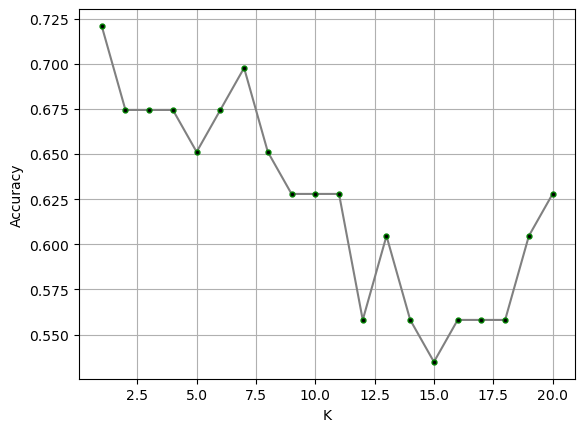

In [44]:
plt.plot(K_value,accuracy,c='grey',marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()